In [1]:
import sys
import seaborn as sns
sys.path.append('../src')

from generator import generate_samples
import statsmodels.formula.api as smf
import pandas as pd

,n,diff
0,5,-7.993606e-15
1,6,5.329071e-15
2,7,2.664535e-15
3,8,-5.773160e-15
4,9,7.105427e-15
...,...,...
90,95,4.440892e-16
91,96,-8.881784e-16
92,97,3.552714e-15
93,98,8.881784e-16


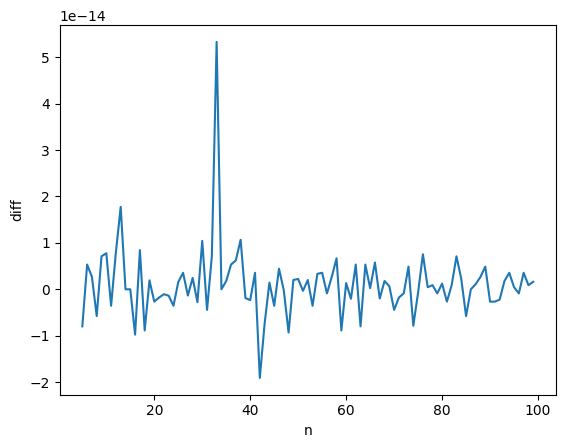

In [2]:
diff = []
for n in range(5, 100):
    data = generate_samples(
        mu_metric=5,
        sigma_metric=1,
        epsilon=2,
        treatment_effect=2,
        size=10_000,
        cov_mu_eps=[(-1,1),(-2,1),(5,2)],
        non_linear=[True, True, True],
        p_binomial=0.05,
    )
    data = data.sample(n)
    result = smf.ols(f'Y ~ Y_before', data=data).fit()
    theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
    diff.append({'n': n, 'diff': result.params['Y_before'] - theta})

r = pd.DataFrame(diff)
sns.lineplot(data=r, x='n', y='diff');
r

In [3]:
data = data.sample(5)
result = smf.ols(f'Y ~ Y_before', data=data).fit()
theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
print(result.params['Y_before'] - theta)
data

3.907985046680551e-14


,Y,T,Y_before,X_1,X_2,X_3,R_1
8219,14.596370,0,4.656760,-0.885841,-1.053078,3.395496,-1.188631
7821,58.305293,0,4.457469,-1.079742,-1.077149,7.202949,1.860772
3416,36.923866,0,4.626023,-1.825071,-1.795229,4.826975,-0.206843
8458,13.720806,0,3.801702,1.870383,-2.941958,1.105600,0.264543
5141,30.881421,0,4.099833,-3.047935,-0.939706,4.101963,0.729494


### Including one covariate more:

,n,diff
0,5,-0.993743
1,6,-2.922805
2,7,-7.397118
3,8,0.122663
4,9,0.658264
...,...,...
90,95,0.007735
91,96,0.327003
92,97,-0.076424
93,98,0.011866


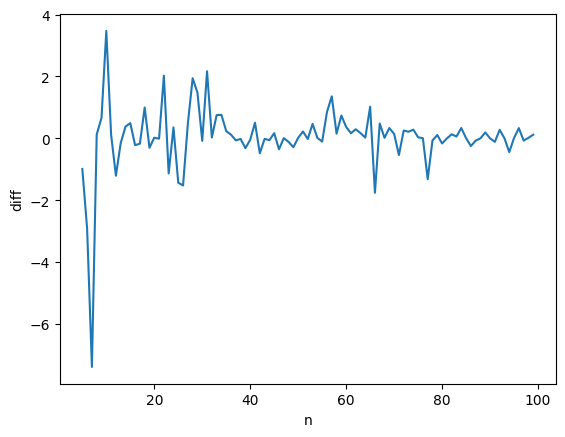

In [4]:
diff = []
for n in range(5, 100):
    data = generate_samples(
        mu_metric=5,
        sigma_metric=1,
        epsilon=2,
        treatment_effect=2,
        size=10_000,
        cov_mu_eps=[(-1,1),(-2,1),(5,2)],
        non_linear=[True, True, True],
        p_binomial=0.05,
    )
    data = data.sample(n)
    result = smf.ols(f'Y ~ Y_before + X_1', data=data).fit()
    theta = data.cov().loc['Y_before', "Y"] / data.cov().loc['Y_before', "Y_before"]
    diff.append({'n': n, 'diff': result.params['Y_before'] - theta})

r = pd.DataFrame(diff)
sns.lineplot(data=r, x='n', y='diff');
r